In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import keras
import time
import random
from keras import Sequential
from keras.layers import Dense,Activation,Dropout,regularizers,Input,BatchNormalization
from keras.models import Model
from keras.optimizers import *
from keras.callbacks import *
from random import sample

from helper import *

Using TensorFlow backend.


In [2]:
features = pd.read_csv('/home/mohit/Desktop/featuresUpdated/finalFeatures.csv')

In [3]:
a = get_penmap()

In [4]:
def distribution(features,a,pen_out):
    Xtrain = {}
    Ytrain = {}
    Xtest={}
    Ytest={}
    b1=0
    c1=0
    for k in range(1,113):
        if(k not in a[pen_out]):
            for i in ['1','2']: 
                for n in ['1','2']:
                    for j in ['1','2','3','4','5','6','7','8'] :
                        for m in ['1','2','3','4','5','6','7','8'] :
                            try:
                                if(i==n and j==m):
                                    continue    
                                elif i==n and 'c_'+str(k)+'_'+n+'_'+m+'::'+i+'_'+j not in Xtrain:
                                    Xtrain['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = abs(features['c'+str(k)+'_'+i+'_'+j]-features['c'+str(k)+'_'+n+'_'+m])
                                    Ytrain['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = 0
                                    c1+=1
                                elif i!=n and 'c_'+str(k)+'_'+n+'_'+m+'::'+i+'_'+j not in Xtrain:                               
                                    Xtrain['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = abs(features['c'+str(k)+'_'+i+'_'+j]-features['c'+str(k)+'_'+n+'_'+m])
                                    Ytrain['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = 1
                                    b1+=1
                            except:
                                pass
     
  #  print('Lengths same pens Train-{} different pens Train-{}'.format(c1,b1))
    b2=0
    c2=0
    for k in range(1,113):
        if(k in a[pen_out]):
            for i in ['1','2']: 
                for n in ['1','2']:
                    for j in ['1','2','3','4','5','6','7','8'] :
                        for m in ['1','2','3','4','5','6','7','8'] :
                            try:
                                if(i==n and j==m):
                                    continue    
                                elif i==n and 'c_'+str(k)+'_'+n+'_'+m+'::'+i+'_'+j not in Xtest:
                                    Xtest['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = abs(features['c'+str(k)+'_'+i+'_'+j]-features['c'+str(k)+'_'+n+'_'+m])
                                    Ytest['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = 0
                                    c2+=1
                                elif i!=n and 'c_'+str(k)+'_'+n+'_'+m+'::'+i+'_'+j not in Xtest :                               
                                    Xtest['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = abs(features['c'+str(k)+'_'+i+'_'+j]-features['c'+str(k)+'_'+n+'_'+m])
                                    Ytest['c_'+str(k)+'_'+i+'_'+j+'::'+n+'_'+m] = 1
                                    b2+=1
                            except:
                                pass
    Xtrain = [ v for v in Xtrain.values() ]
    Ytrain = [ v for v in Ytrain.values() ]
    Xtest = [ v for v in Xtest.values() ]
    Ytest = [ v for v in Ytest.values() ]
     
 #   print('Lengths same pens Test-{} different pens Test-{}'.format(c2,b2))
    return Xtrain,Ytrain,Xtest,Ytest,(c1+b1)//10

In [5]:
unknown_acc = {}
known_acc = {}
histories = {}


PEN LEFT OUT --->> 1
CROSS VALIDATION STEP :1


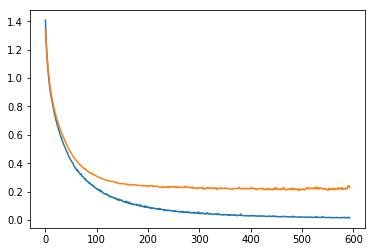

Known pen accuracy : 0.9606299142199238
Unknown pen accuracy : 0.9304812811912699
CROSS VALIDATION STEP :2


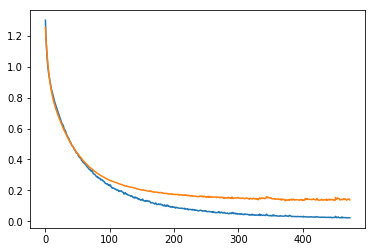

Known pen accuracy : 0.9291338512277979
Unknown pen accuracy : 0.9491978625562739
CROSS VALIDATION STEP :3


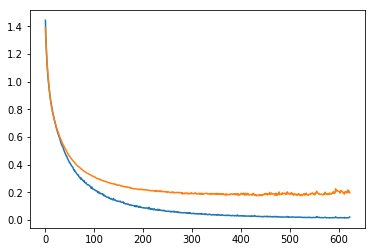

Known pen accuracy : 0.9409448748498451
Unknown pen accuracy : 0.9278074898184302
CROSS VALIDATION STEP :4


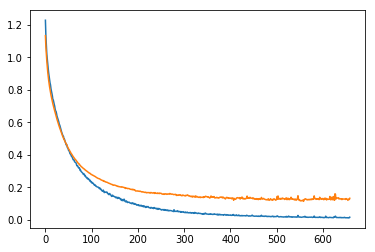

Known pen accuracy : 0.940944875319173
Unknown pen accuracy : 0.9598930513157564
CROSS VALIDATION STEP :5


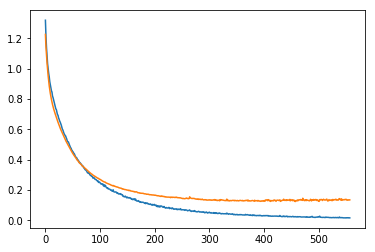

Known pen accuracy : 0.940944885644387
Unknown pen accuracy : 0.9385026753904985
CROSS VALIDATION STEP :6


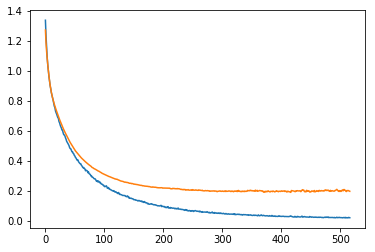

Known pen accuracy : 0.940944885644387
Unknown pen accuracy : 0.9438502705670933
CROSS VALIDATION STEP :7


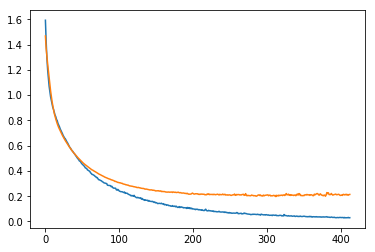

Known pen accuracy : 0.9370078707304527
Unknown pen accuracy : 0.9304812866098741
CROSS VALIDATION STEP :8


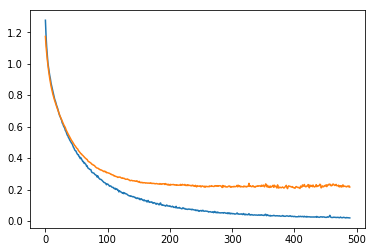

Known pen accuracy : 0.9448818827238609
Unknown pen accuracy : 0.9518716593477178
CROSS VALIDATION STEP :9


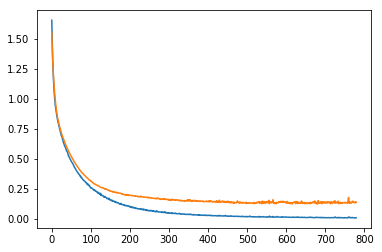

Known pen accuracy : 0.9527558984718923
Unknown pen accuracy : 0.9491978625562739
CROSS VALIDATION STEP :10


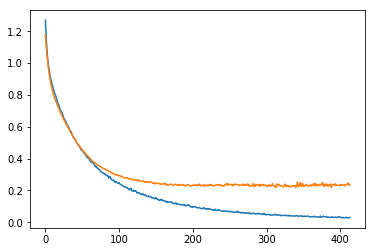

Known pen accuracy : 0.9488189013924185
Unknown pen accuracy : 0.9518716593477178
PEN LEFT OUT --->> 2
CROSS VALIDATION STEP :1


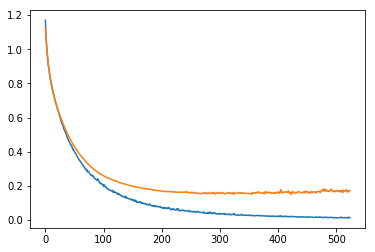

Known pen accuracy : 0.9766536964980544
Unknown pen accuracy : 0.8157894750784712
CROSS VALIDATION STEP :2


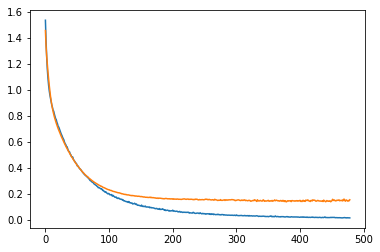

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.8187134516866583
CROSS VALIDATION STEP :3


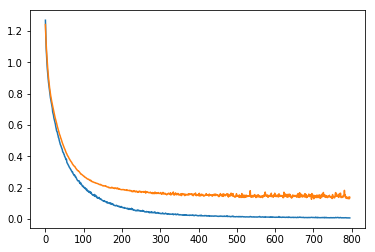

Known pen accuracy : 0.9494163424124513
Unknown pen accuracy : 0.8011695920375356
CROSS VALIDATION STEP :4


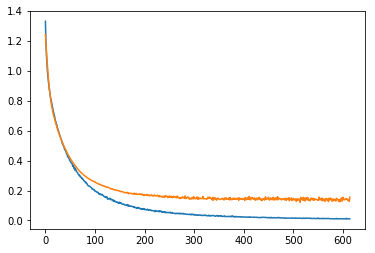

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.830409356376581
CROSS VALIDATION STEP :5


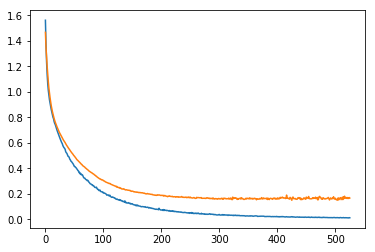

Known pen accuracy : 0.9494163424124513
Unknown pen accuracy : 0.8216374255063241
CROSS VALIDATION STEP :6


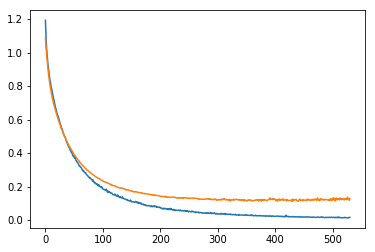

Known pen accuracy : 0.9455252918287937
Unknown pen accuracy : 0.8245614021145112
CROSS VALIDATION STEP :7


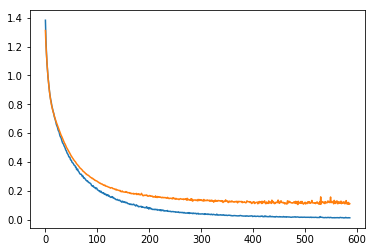

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.8304093553308856
CROSS VALIDATION STEP :8


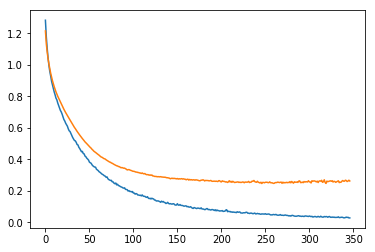

Known pen accuracy : 0.9766536964980544
Unknown pen accuracy : 0.8099415208164015
CROSS VALIDATION STEP :9


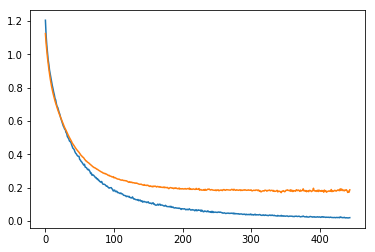

Known pen accuracy : 0.953307392996109
Unknown pen accuracy : 0.8333333319390727
CROSS VALIDATION STEP :10


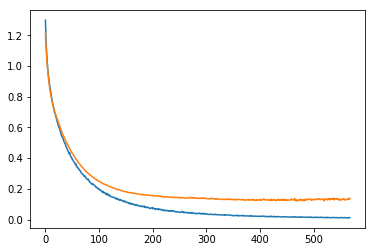

Known pen accuracy : 0.9571984435797666
Unknown pen accuracy : 0.8216374282948455
PEN LEFT OUT --->> 3
CROSS VALIDATION STEP :1


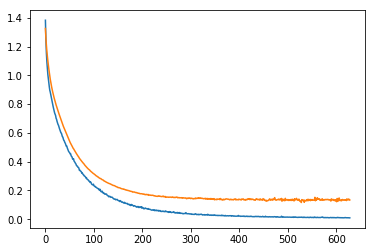

Known pen accuracy : 0.9734513232138304
Unknown pen accuracy : 0.8683812409954965
CROSS VALIDATION STEP :2


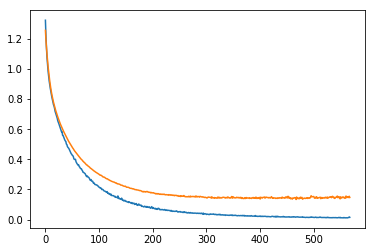

Known pen accuracy : 0.9690265444527685
Unknown pen accuracy : 0.8789712561240896
CROSS VALIDATION STEP :3


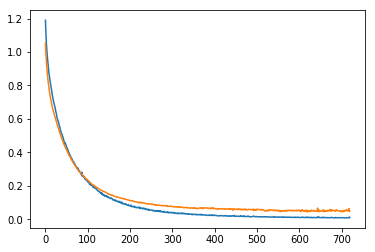

Known pen accuracy : 0.9469026506474588
Unknown pen accuracy : 0.8396369142178869
CROSS VALIDATION STEP :4


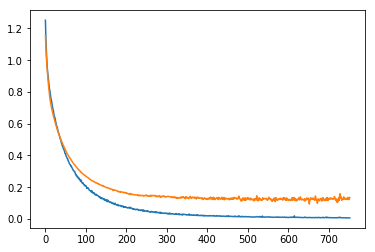

Known pen accuracy : 0.9380530936528096
Unknown pen accuracy : 0.8517397886505647
CROSS VALIDATION STEP :5


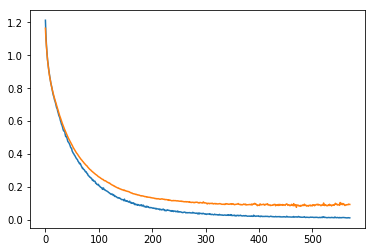

Known pen accuracy : 0.9469026506474588
Unknown pen accuracy : 0.874432678121662
CROSS VALIDATION STEP :6


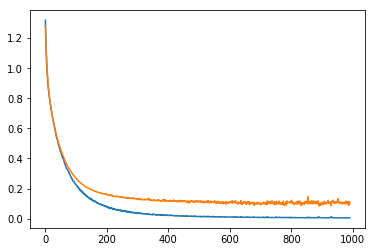

Known pen accuracy : 0.9557522123893806
Unknown pen accuracy : 0.8562783665628187
CROSS VALIDATION STEP :7


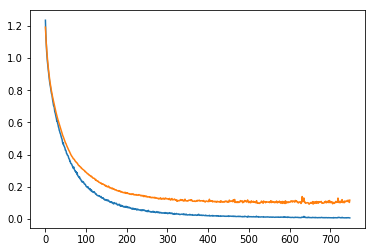

Known pen accuracy : 0.9601769911504425
Unknown pen accuracy : 0.8653555223873272
CROSS VALIDATION STEP :8


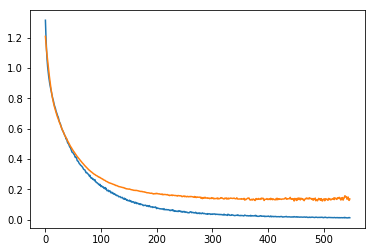

Known pen accuracy : 0.9557522086970573
Unknown pen accuracy : 0.8668683815110649
CROSS VALIDATION STEP :9


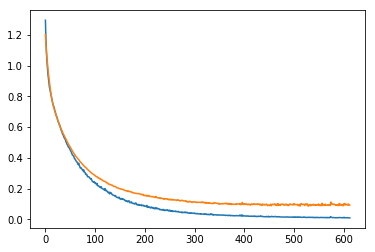

Known pen accuracy : 0.9557522129168553
Unknown pen accuracy : 0.8517397886505647
CROSS VALIDATION STEP :10


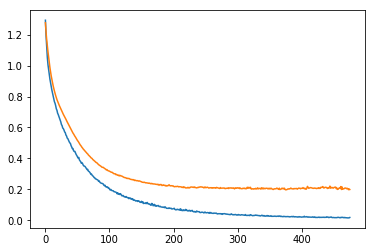

Known pen accuracy : 0.9646017699115044
Unknown pen accuracy : 0.8623298037791577
PEN LEFT OUT --->> 4
CROSS VALIDATION STEP :1


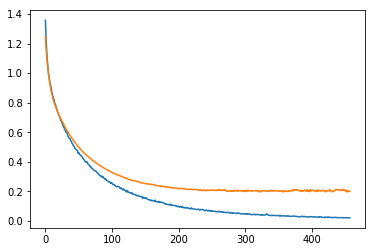

Known pen accuracy : 0.9467213153839111
Unknown pen accuracy : 0.9267782411814733
CROSS VALIDATION STEP :2


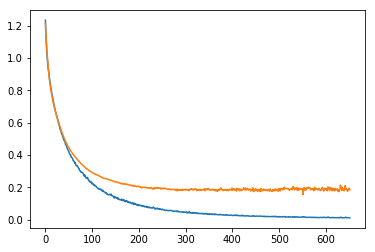

Known pen accuracy : 0.9303278659210831
Unknown pen accuracy : 0.905857739338815
CROSS VALIDATION STEP :3


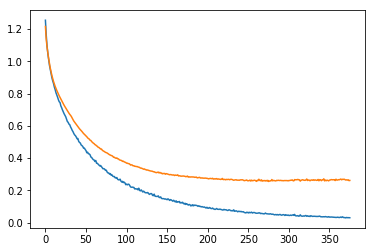

Known pen accuracy : 0.9303278668982083
Unknown pen accuracy : 0.9184100400952615
CROSS VALIDATION STEP :4


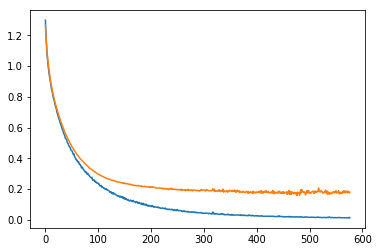

Known pen accuracy : 0.9262295091738466
Unknown pen accuracy : 0.9079497910443709
CROSS VALIDATION STEP :5


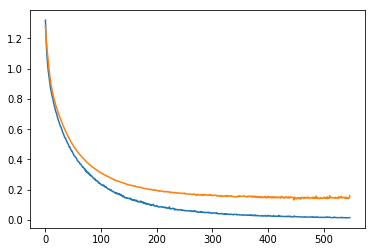

Known pen accuracy : 0.9508196760396488
Unknown pen accuracy : 0.9288702911412866
CROSS VALIDATION STEP :6


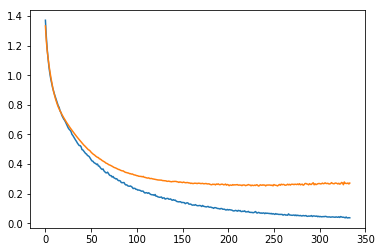

Known pen accuracy : 0.9262295023339694
Unknown pen accuracy : 0.9100418395078332
CROSS VALIDATION STEP :7


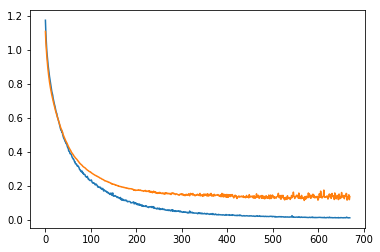

Known pen accuracy : 0.9303278668982083
Unknown pen accuracy : 0.9037656908753526
CROSS VALIDATION STEP :8


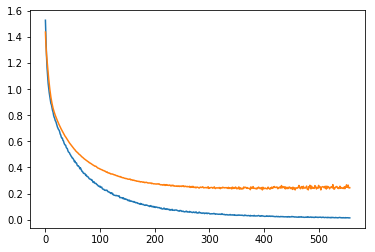

Known pen accuracy : 0.9508196662683956
Unknown pen accuracy : 0.9100418412535759
CROSS VALIDATION STEP :9


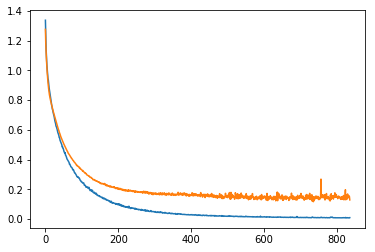

Known pen accuracy : 0.922131148518109
Unknown pen accuracy : 0.8870292872065779
CROSS VALIDATION STEP :10


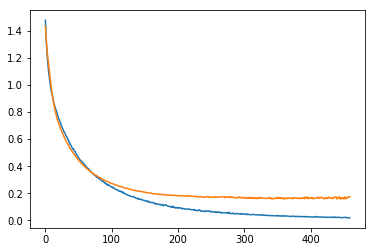

Known pen accuracy : 0.9385245843011825
Unknown pen accuracy : 0.8953974897891408
PEN LEFT OUT --->> 5
CROSS VALIDATION STEP :1


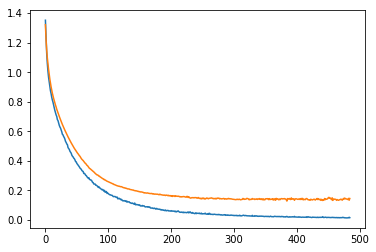

Known pen accuracy : 0.9797570888812726
Unknown pen accuracy : 0.7735426019660026
CROSS VALIDATION STEP :2


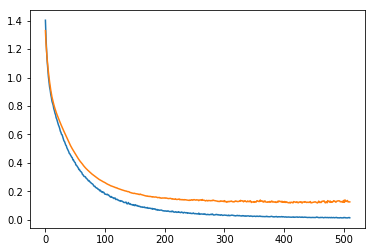

Known pen accuracy : 0.9676113398934183
Unknown pen accuracy : 0.7982062812343307
CROSS VALIDATION STEP :3


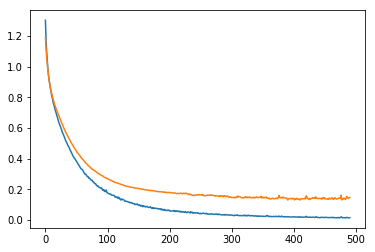

Known pen accuracy : 0.9392712589217583
Unknown pen accuracy : 0.7802690596323911
CROSS VALIDATION STEP :4


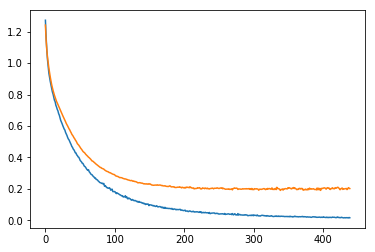

Known pen accuracy : 0.9716599173391396
Unknown pen accuracy : 0.7825112118314734
CROSS VALIDATION STEP :5


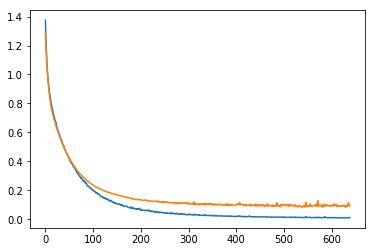

Known pen accuracy : 0.97165991902834
Unknown pen accuracy : 0.7802690553558247
CROSS VALIDATION STEP :6


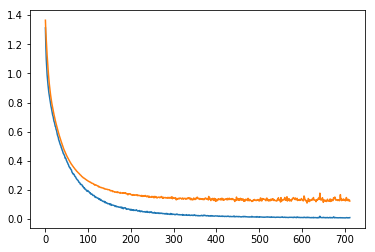

Known pen accuracy : 0.9716599228893698
Unknown pen accuracy : 0.7847533642978411
CROSS VALIDATION STEP :7


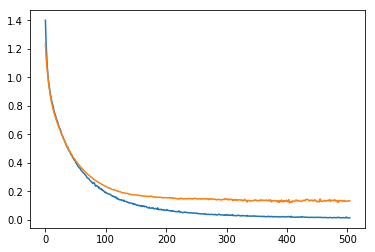

Known pen accuracy : 0.9595141739015155
Unknown pen accuracy : 0.7847533642978411
CROSS VALIDATION STEP :8


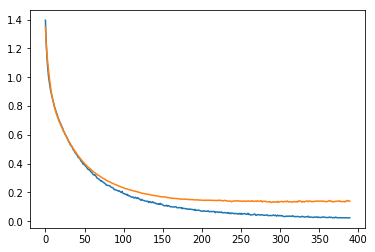

Known pen accuracy : 0.9635627568974668
Unknown pen accuracy : 0.7690582991715504
CROSS VALIDATION STEP :9


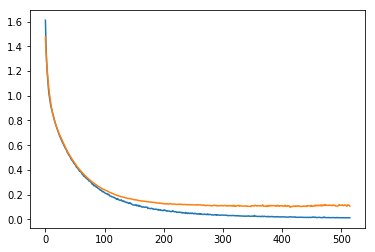

Known pen accuracy : 0.9757084964740614
Unknown pen accuracy : 0.7892376692305766
CROSS VALIDATION STEP :10


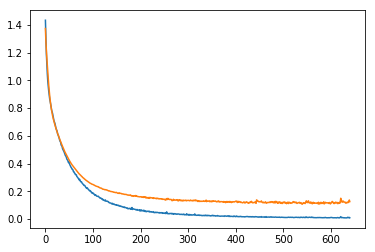

Known pen accuracy : 0.9433198325064501
Unknown pen accuracy : 0.7690582930239861
PEN LEFT OUT --->> 6
CROSS VALIDATION STEP :1


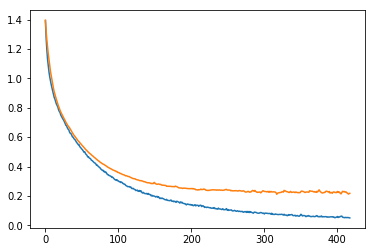

Known pen accuracy : 0.9525691647774617
Unknown pen accuracy : 0.8564102561045915
CROSS VALIDATION STEP :2


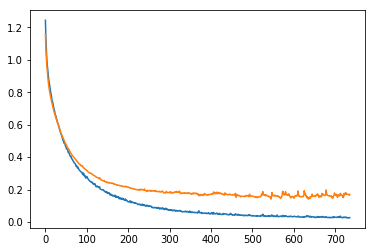

Known pen accuracy : 0.9565217391304348
Unknown pen accuracy : 0.8769230766174121
CROSS VALIDATION STEP :3


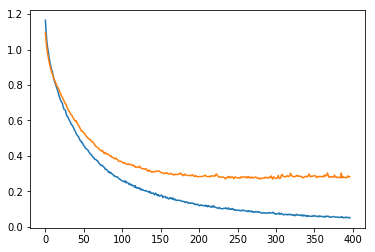

Known pen accuracy : 0.9130434780252781
Unknown pen accuracy : 0.8743589740533095
CROSS VALIDATION STEP :4


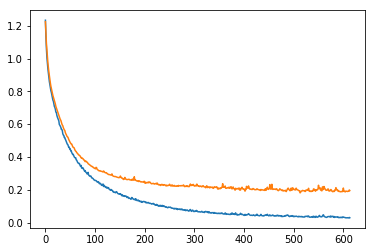

Known pen accuracy : 0.9604743031173827
Unknown pen accuracy : 0.8435897432840788
CROSS VALIDATION STEP :5


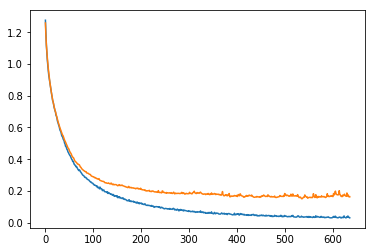

Known pen accuracy : 0.9644268725229346
Unknown pen accuracy : 0.8589743586686941
CROSS VALIDATION STEP :6


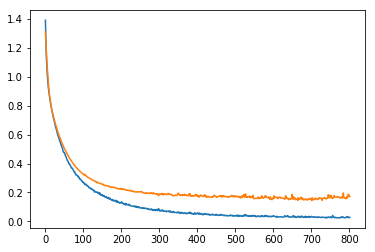

Known pen accuracy : 0.9604743083003953
Unknown pen accuracy : 0.8487179484122839
CROSS VALIDATION STEP :7


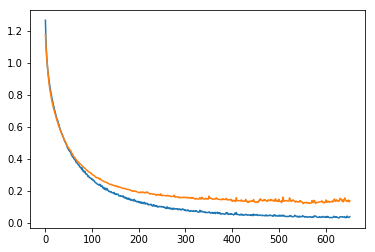

Known pen accuracy : 0.948616605266752
Unknown pen accuracy : 0.8564102561045915
CROSS VALIDATION STEP :8


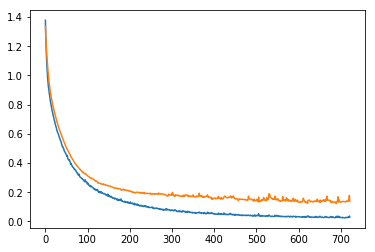

Known pen accuracy : 0.9288537594169496
Unknown pen accuracy : 0.8641025637968992
CROSS VALIDATION STEP :9


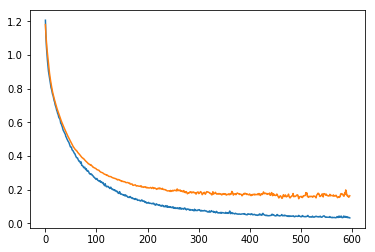

Known pen accuracy : 0.9328063238750804
Unknown pen accuracy : 0.8487179487179487
CROSS VALIDATION STEP :10


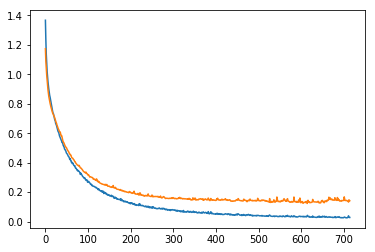

Known pen accuracy : 0.9446640316205533
Unknown pen accuracy : 0.8666666663610019
PEN LEFT OUT --->> 7
CROSS VALIDATION STEP :1


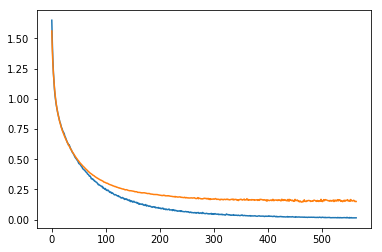

Known pen accuracy : 0.9788135633630267
Unknown pen accuracy : 0.84560143690777
CROSS VALIDATION STEP :2


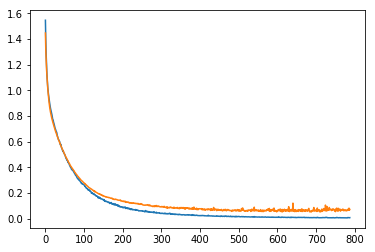

Known pen accuracy : 0.961864406779661
Unknown pen accuracy : 0.8456014365867396
CROSS VALIDATION STEP :3


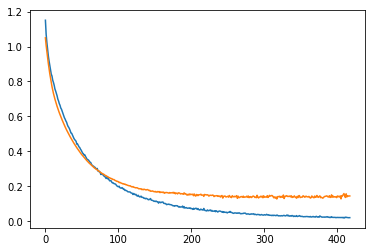

Known pen accuracy : 0.9237288105285774
Unknown pen accuracy : 0.8384201082549788
CROSS VALIDATION STEP :4


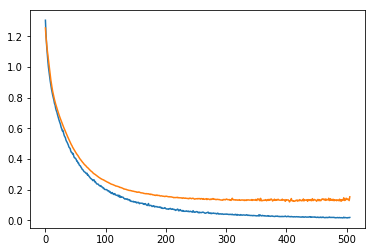

Known pen accuracy : 0.9491525403523849
Unknown pen accuracy : 0.8563734296194313
CROSS VALIDATION STEP :5


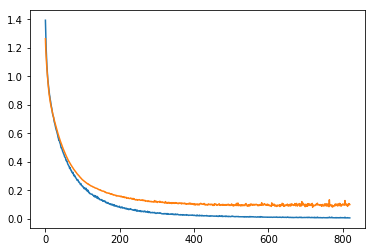

Known pen accuracy : 0.944915258278281
Unknown pen accuracy : 0.8348294441961086
CROSS VALIDATION STEP :6


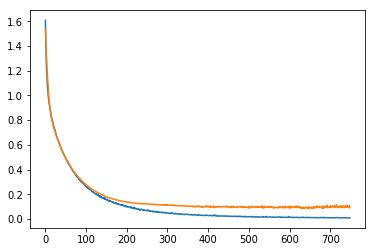

Known pen accuracy : 0.9661016989562471
Unknown pen accuracy : 0.831238779816208
CROSS VALIDATION STEP :7


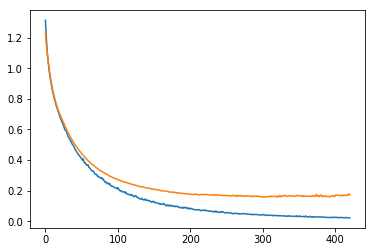

Known pen accuracy : 0.9533898345494675
Unknown pen accuracy : 0.8186714549681015
CROSS VALIDATION STEP :8


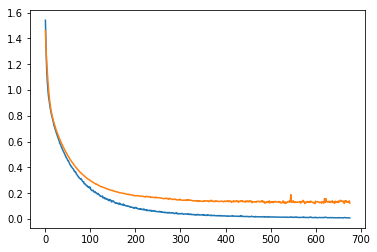

Known pen accuracy : 0.9491525433831296
Unknown pen accuracy : 0.8312387800302283
CROSS VALIDATION STEP :9


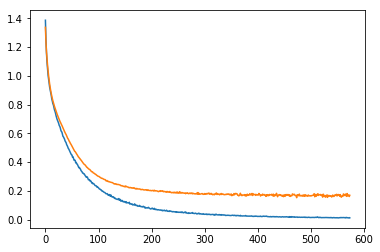

Known pen accuracy : 0.9237288186105631
Unknown pen accuracy : 0.8366247760115235
CROSS VALIDATION STEP :10


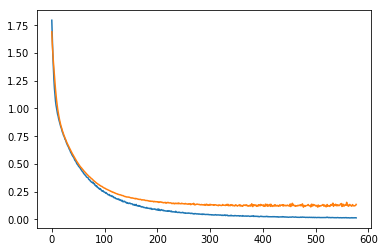

Known pen accuracy : 0.9661016959255024
Unknown pen accuracy : 0.8491921010736503
PEN LEFT OUT --->> 8
CROSS VALIDATION STEP :1


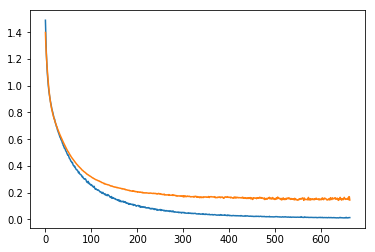

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.9770114942528736
CROSS VALIDATION STEP :2


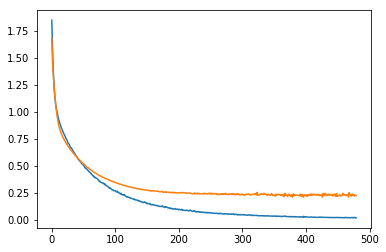

Known pen accuracy : 0.9455252918287937
Unknown pen accuracy : 0.9798850588414861
CROSS VALIDATION STEP :3


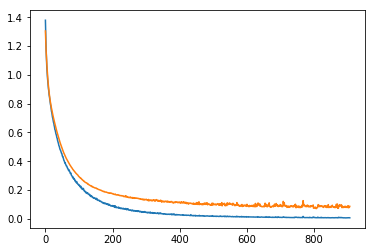

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.9741379324047045
CROSS VALIDATION STEP :4


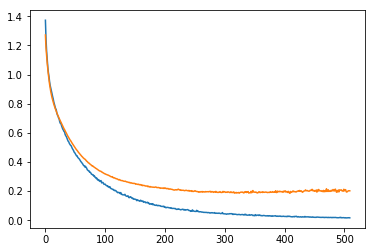

Known pen accuracy : 0.9455252918287937
Unknown pen accuracy : 0.9626436781609196
CROSS VALIDATION STEP :5


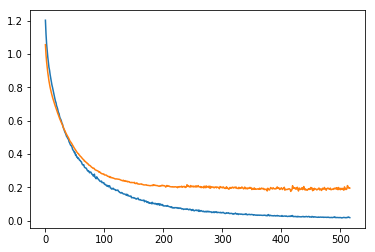

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.9655172427495321
CROSS VALIDATION STEP :6


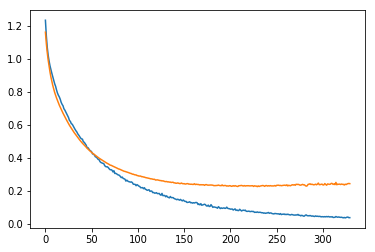

Known pen accuracy : 0.9221789883268483
Unknown pen accuracy : 0.9540229885057471
CROSS VALIDATION STEP :7


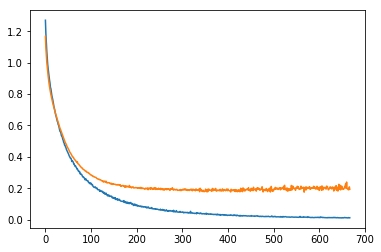

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.9597701149425287
CROSS VALIDATION STEP :8


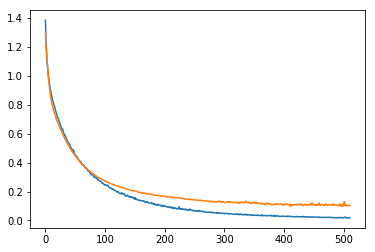

Known pen accuracy : 0.9416342412451362
Unknown pen accuracy : 0.9770114956230953
CROSS VALIDATION STEP :9


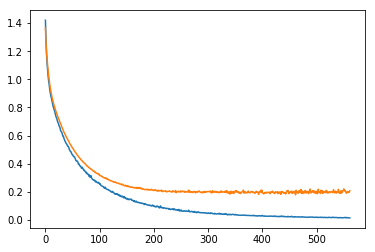

Known pen accuracy : 0.9610894941634242
Unknown pen accuracy : 0.9683908059679228
CROSS VALIDATION STEP :10


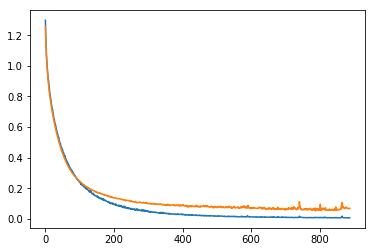

Known pen accuracy : 0.9455252918287937
Unknown pen accuracy : 0.9597701149425287
PEN LEFT OUT --->> 9
CROSS VALIDATION STEP :1


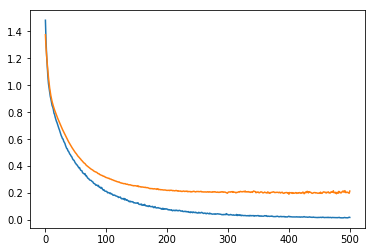

Known pen accuracy : 0.9734848484848485
Unknown pen accuracy : 0.8681318681318682
CROSS VALIDATION STEP :2


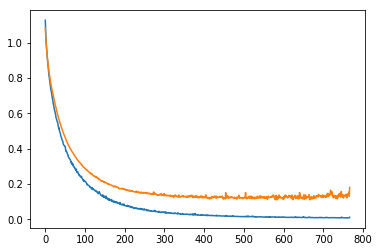

Known pen accuracy : 0.9507575757575758
Unknown pen accuracy : 0.8681318681318682
CROSS VALIDATION STEP :3


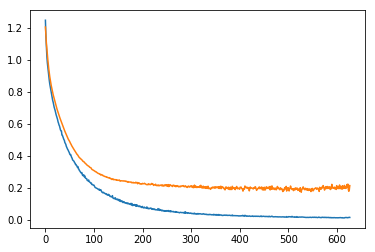

Known pen accuracy : 0.9545454545454546
Unknown pen accuracy : 0.8791208791208791
CROSS VALIDATION STEP :4


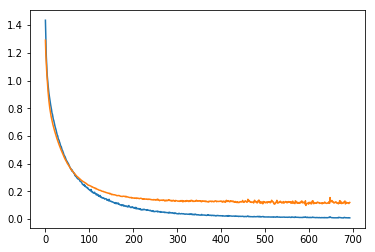

Known pen accuracy : 0.946969696969697
Unknown pen accuracy : 0.8827838827838828
CROSS VALIDATION STEP :5


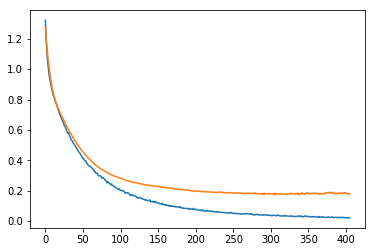

Known pen accuracy : 0.9393939393939394
Unknown pen accuracy : 0.8827838827838828
CROSS VALIDATION STEP :6


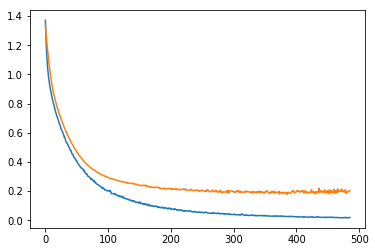

Known pen accuracy : 0.928030303030303
Unknown pen accuracy : 0.8791208791208791
CROSS VALIDATION STEP :7


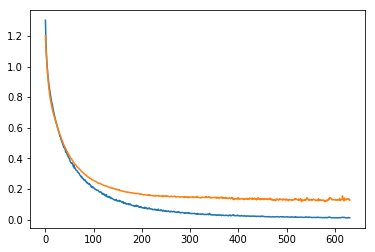

Known pen accuracy : 0.9431818181818182
Unknown pen accuracy : 0.8644688644688645
CROSS VALIDATION STEP :8


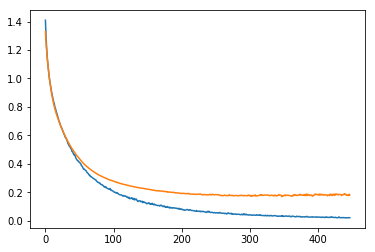

Known pen accuracy : 0.9583333333333334
Unknown pen accuracy : 0.8644688646871965
CROSS VALIDATION STEP :9


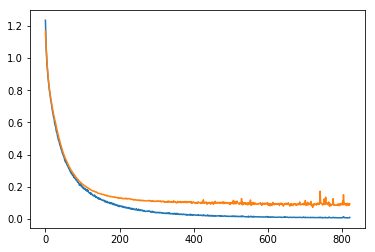

Known pen accuracy : 0.9356060606060606
Unknown pen accuracy : 0.8424908424908425
CROSS VALIDATION STEP :10


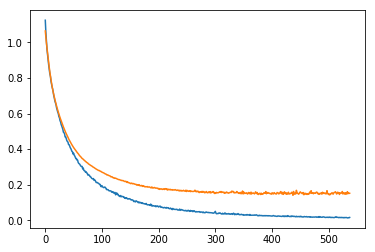

Known pen accuracy : 0.9393939393939394
Unknown pen accuracy : 0.8644688644688645
PEN LEFT OUT --->> 10
CROSS VALIDATION STEP :1


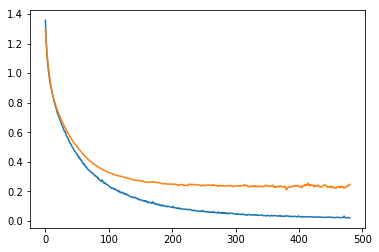

Known pen accuracy : 0.9471544715447154
Unknown pen accuracy : 0.9052863436123348
CROSS VALIDATION STEP :2


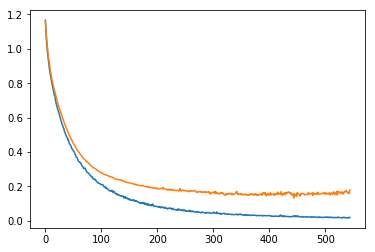

Known pen accuracy : 0.9512195121951219
Unknown pen accuracy : 0.8920704845814978
CROSS VALIDATION STEP :3


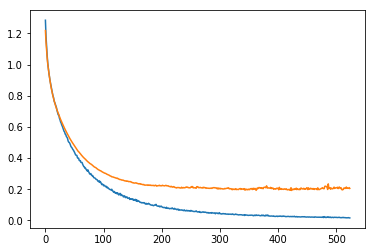

Known pen accuracy : 0.9512195063800346
Unknown pen accuracy : 0.9162995594713657
CROSS VALIDATION STEP :4


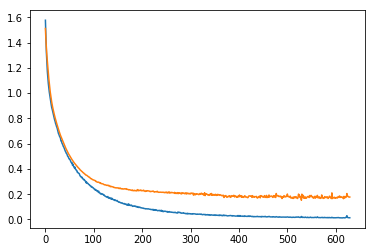

Known pen accuracy : 0.9552845470304412
Unknown pen accuracy : 0.9052863436123348
CROSS VALIDATION STEP :5


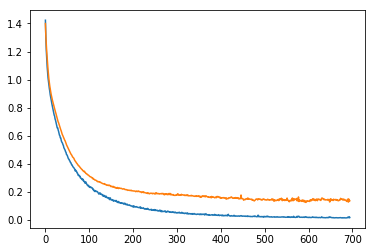

Known pen accuracy : 0.9471544657296281
Unknown pen accuracy : 0.9008810572687225
CROSS VALIDATION STEP :6


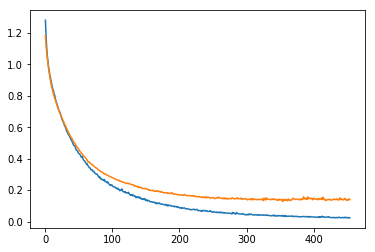

Known pen accuracy : 0.9390243926668554
Unknown pen accuracy : 0.9140969162995595
CROSS VALIDATION STEP :7


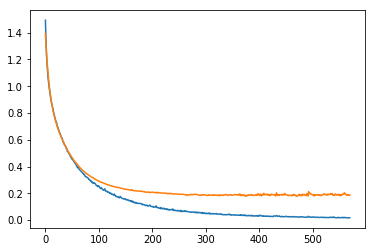

Known pen accuracy : 0.9390243950898085
Unknown pen accuracy : 0.9118942731277533
CROSS VALIDATION STEP :8


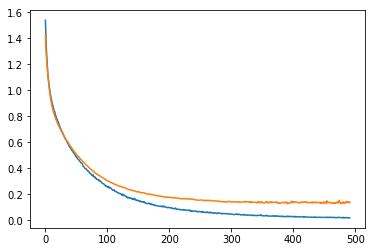

Known pen accuracy : 0.9471544763906216
Unknown pen accuracy : 0.9008810572687225
CROSS VALIDATION STEP :9


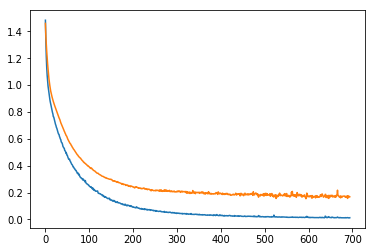

Known pen accuracy : 0.9349593437784086
Unknown pen accuracy : 0.9008810572687225
CROSS VALIDATION STEP :10


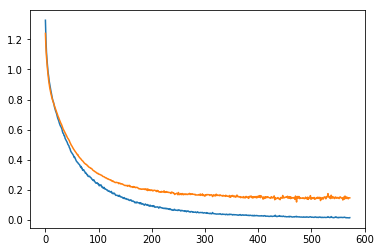

Known pen accuracy : 0.9634146341463414
Unknown pen accuracy : 0.9052863436123348
PEN LEFT OUT --->> 11
CROSS VALIDATION STEP :1


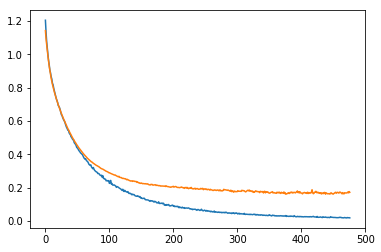

Known pen accuracy : 0.9728682170542635
Unknown pen accuracy : 0.941176469185773
CROSS VALIDATION STEP :2


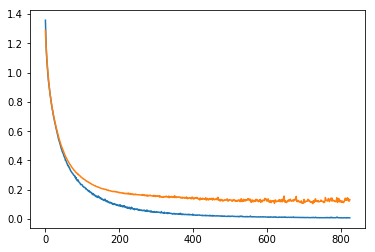

Known pen accuracy : 0.9418604651162791
Unknown pen accuracy : 0.9264705868328319
CROSS VALIDATION STEP :3


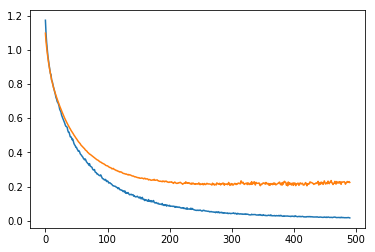

Known pen accuracy : 0.9263565891472868
Unknown pen accuracy : 0.96470588165171
CROSS VALIDATION STEP :4


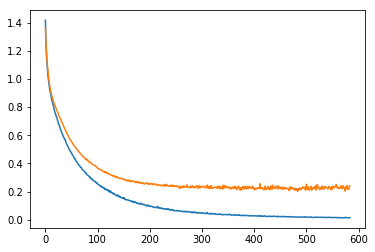

Known pen accuracy : 0.9457364341085271
Unknown pen accuracy : 0.9558823522399453
CROSS VALIDATION STEP :5


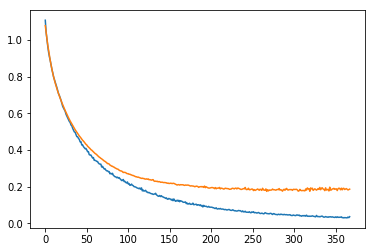

Known pen accuracy : 0.9341085271317829
Unknown pen accuracy : 0.9382352927151848
CROSS VALIDATION STEP :6


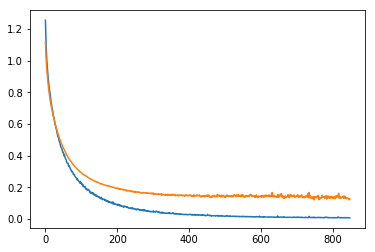

Known pen accuracy : 0.9147286821705426
Unknown pen accuracy : 0.9294117633034201
CROSS VALIDATION STEP :7


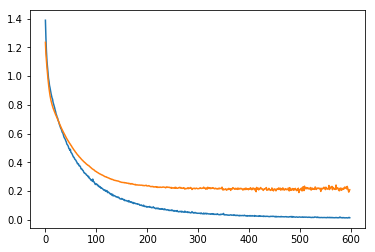

Known pen accuracy : 0.937984496124031
Unknown pen accuracy : 0.9323529404752394
CROSS VALIDATION STEP :8


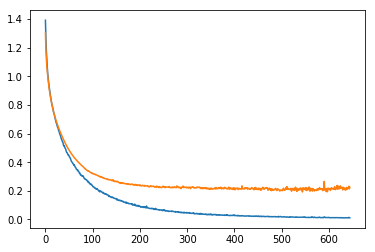

Known pen accuracy : 0.9573643410852714
Unknown pen accuracy : 0.9676470581222983
CROSS VALIDATION STEP :9


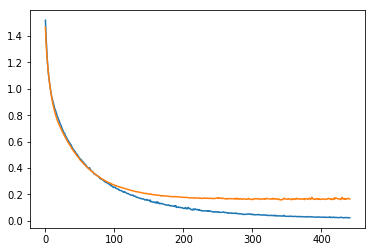

Known pen accuracy : 0.9573643410852714
Unknown pen accuracy : 0.941176469185773
CROSS VALIDATION STEP :10


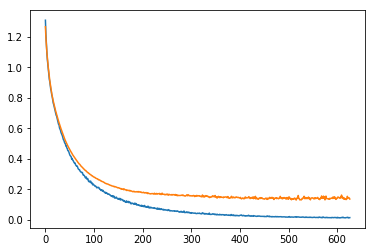

Known pen accuracy : 0.9534883720930233
Unknown pen accuracy : 0.9470588228281807
PEN LEFT OUT --->> 12
CROSS VALIDATION STEP :1


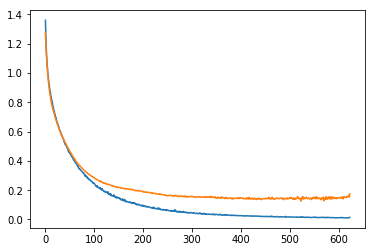

Known pen accuracy : 0.9420849420849421
Unknown pen accuracy : 0.8939393932169134
CROSS VALIDATION STEP :2


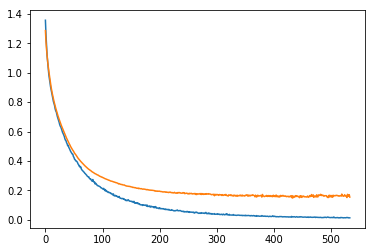

Known pen accuracy : 0.9343629343629344
Unknown pen accuracy : 0.8757575750350952
CROSS VALIDATION STEP :3


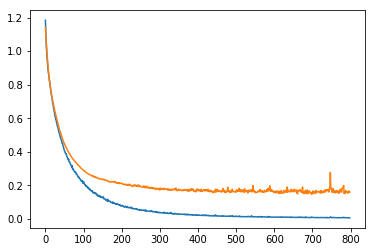

Known pen accuracy : 0.9343629343629344
Unknown pen accuracy : 0.8757575757575757
CROSS VALIDATION STEP :4


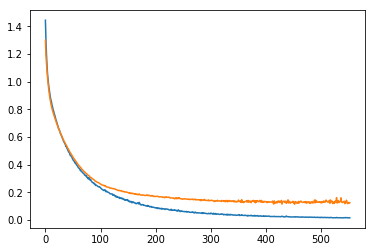

Known pen accuracy : 0.9343629343629344
Unknown pen accuracy : 0.8545454545454545
CROSS VALIDATION STEP :5


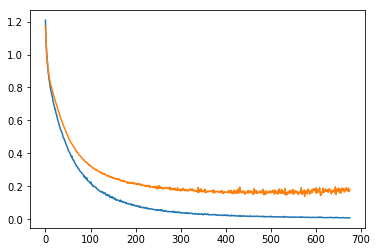

Known pen accuracy : 0.9498069498069498
Unknown pen accuracy : 0.896969696969697
CROSS VALIDATION STEP :6


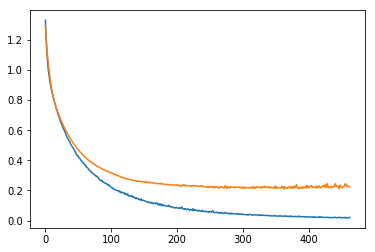

Known pen accuracy : 0.9459459459459459
Unknown pen accuracy : 0.8757575757575757
CROSS VALIDATION STEP :7


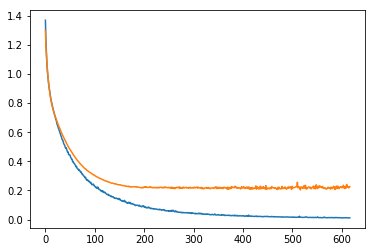

Known pen accuracy : 0.9420849420849421
Unknown pen accuracy : 0.8818181818181818
CROSS VALIDATION STEP :8


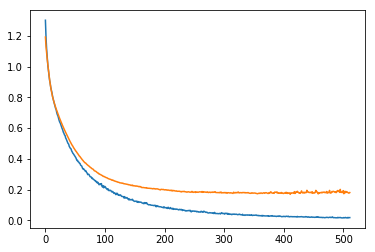

Known pen accuracy : 0.9575289575289575
Unknown pen accuracy : 0.8909090901866104
CROSS VALIDATION STEP :9


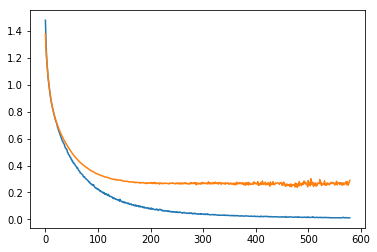

Known pen accuracy : 0.9266409266409267
Unknown pen accuracy : 0.906060606060606
CROSS VALIDATION STEP :10


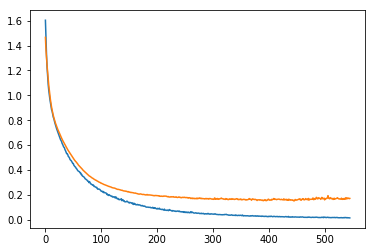

Known pen accuracy : 0.9498069498069498
Unknown pen accuracy : 0.8909090909090909
PEN LEFT OUT --->> 13
CROSS VALIDATION STEP :1


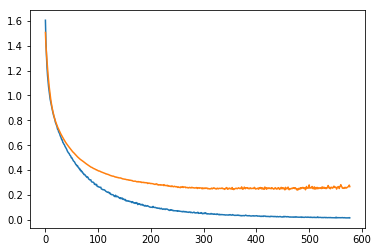

Known pen accuracy : 0.9585062300021223
Unknown pen accuracy : 0.9223107581594551
CROSS VALIDATION STEP :2


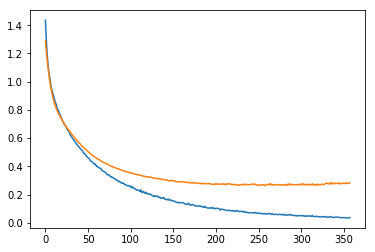

Known pen accuracy : 0.9294605809128631
Unknown pen accuracy : 0.9322709187093484
CROSS VALIDATION STEP :3


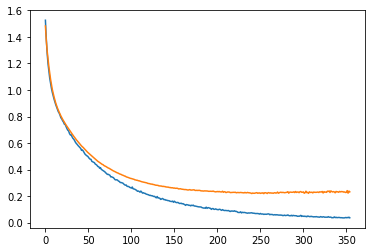

Known pen accuracy : 0.9336099644419563
Unknown pen accuracy : 0.9402390438247012
CROSS VALIDATION STEP :4


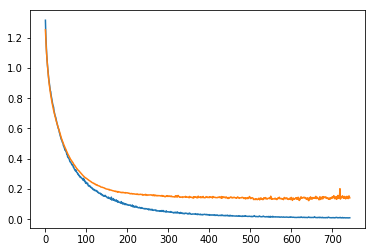

Known pen accuracy : 0.9336099543017471
Unknown pen accuracy : 0.9362549812670248
CROSS VALIDATION STEP :5


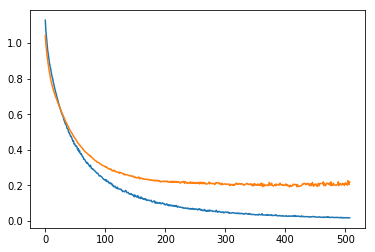

Known pen accuracy : 0.9460580972220393
Unknown pen accuracy : 0.926294817867507
CROSS VALIDATION STEP :6


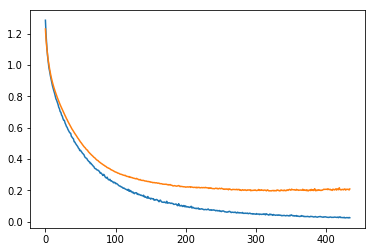

Known pen accuracy : 0.9377593318951081
Unknown pen accuracy : 0.924302790031965
CROSS VALIDATION STEP :7


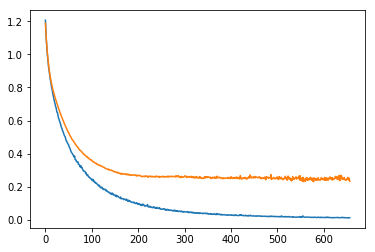

Known pen accuracy : 0.9294605868485953
Unknown pen accuracy : 0.9282868537769849
CROSS VALIDATION STEP :8


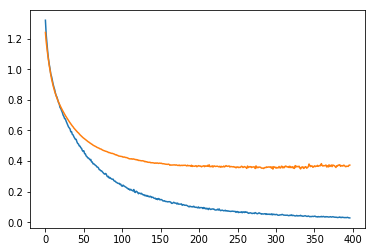

Known pen accuracy : 0.954356842268552
Unknown pen accuracy : 0.9382470131395347
CROSS VALIDATION STEP :9


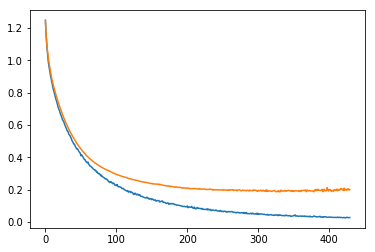

Known pen accuracy : 0.9502074728368229
Unknown pen accuracy : 0.9342629493945148
CROSS VALIDATION STEP :10


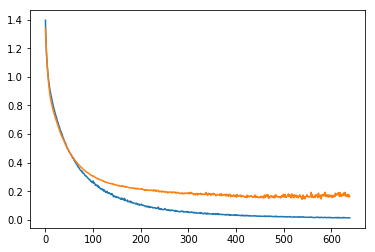

Known pen accuracy : 0.9460580932648844
Unknown pen accuracy : 0.9302788844621513
PEN LEFT OUT --->> 14
CROSS VALIDATION STEP :1


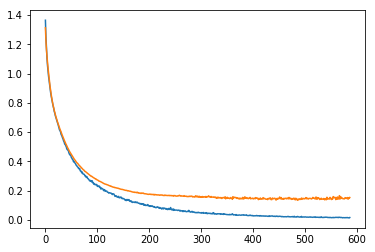

Known pen accuracy : 0.953307392996109
Unknown pen accuracy : 0.9337175797660344
CROSS VALIDATION STEP :2


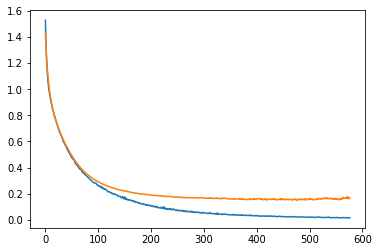

Known pen accuracy : 0.9299610894941635
Unknown pen accuracy : 0.9337175780483213
CROSS VALIDATION STEP :3


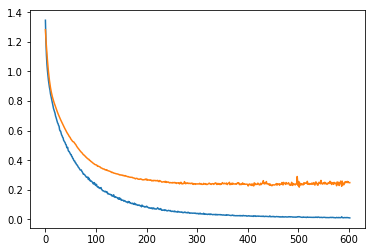

Known pen accuracy : 0.9221789883268483
Unknown pen accuracy : 0.9481268033857648
CROSS VALIDATION STEP :4


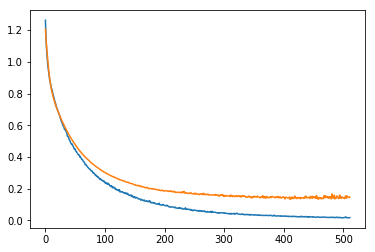

Known pen accuracy : 0.9299610894941635
Unknown pen accuracy : 0.9423631146249579
CROSS VALIDATION STEP :5


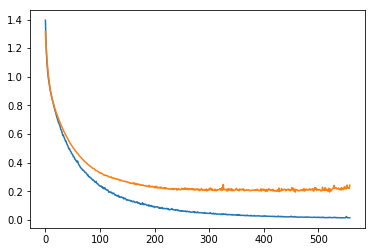

Known pen accuracy : 0.9455252918287937
Unknown pen accuracy : 0.9365994241464378
CROSS VALIDATION STEP :6


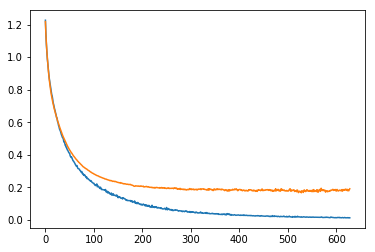

Known pen accuracy : 0.9299610894941635
Unknown pen accuracy : 0.9365994229440386
CROSS VALIDATION STEP :7


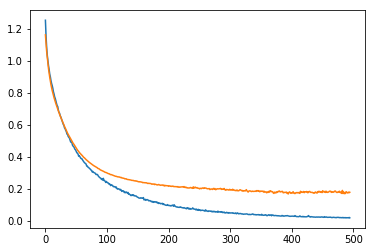

Known pen accuracy : 0.9494163424124513
Unknown pen accuracy : 0.9510086477661682
CROSS VALIDATION STEP :8


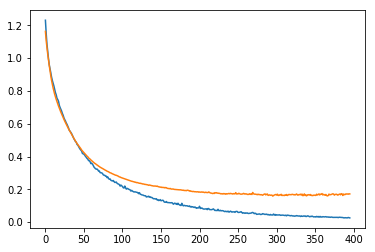

Known pen accuracy : 0.9299610894941635
Unknown pen accuracy : 0.9394812702445544
CROSS VALIDATION STEP :9


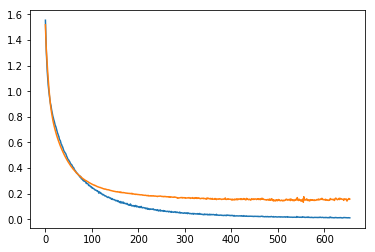

Known pen accuracy : 0.9377431906614786
Unknown pen accuracy : 0.9510086477661682
CROSS VALIDATION STEP :10


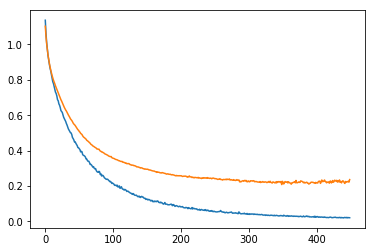

Known pen accuracy : 0.9221789883268483
Unknown pen accuracy : 0.9481268016680516
CPU times: user 2h 52min 58s, sys: 15min 20s, total: 3h 8min 18s
Wall time: 1h 58min 56s


In [6]:
%%time

for penout in range(1,15):
    print("PEN LEFT OUT --->> {}".format(penout))
    
    unknown_acc[penout]= [0,0,0,0,0,0,0,0,0,0]       # these dicts will store a list of accuracies for all Cross validation steps 
    known_acc[penout]  = [0,0,0,0,0,0,0,0,0,0]       # with index = penout 
    histories[penout]  = []
    for cross in range(0,10):
        print("CROSS VALIDATION STEP :{}".format(cross+1))
        
        # examples are distributed among unknown pens and known pens and then known pens are divided in 10 parts
        # and one of the parts is selected for each cross validation step
        # 9 parts of the known pens are further divided into validation and training sets randomly
        
        X,Y,Xte,Yte,val= distribution(features,a,penout)

        x_unknown = np.array(Xte)
        y_unknown = np.array(Yte) 

        x_known   = X[cross*val:(cross+1)*val]
        y_known   = Y[cross*val:(cross+1)*val]

        xtrain = X[0:cross*val]+X[(cross+1)*val:]
        ytrain = Y[0:cross*val]+Y[(cross+1)*val:]

        xtrain,ytrain,x_known,y_known = np.array(xtrain),np.array(ytrain),np.array(x_known),np.array(y_known)

        indices = sample(range(len(xtrain)),len(xtrain)//10)

        xval = xtrain[indices]
        yval = ytrain[indices]

        xtrain= np.delete(xtrain,indices,axis = 0 )
        ytrain = np.delete(ytrain,indices,axis = 0 )

        # So, we have xtrain for training , xval for deciding stopping criteria , x_known for testing known pens 
        # and x_unknown for testing unknown pens.
        # we will apply min-max normalisation on the entire set by using minimum and maximum of the known pen set

        for i in range(0,xtrain.shape[1]):

            mi = min(np.min(xtrain[:,i]),np.min(xval[:,i]),np.min(x_known[:,i]))
            mx = max(np.max(xtrain[:,i]),np.max(xval[:,i]),np.max(x_known[:,i]))

            xtrain[:,i]-=mi
            xval[:,i]-=mi
            x_known[:,i]-=mi
            x_unknown[:,i]-=mi

            xtrain[:,i]/=(mx-mi)
            xval[:,i]/=(mx-mi)
            x_known[:,i]/=(mx-mi)
            x_unknown[:,i]/=(mx-mi)

        xtrain= np.nan_to_num(xtrain)
        xval= np.nan_to_num(xval)
        x_known= np.nan_to_num(x_known)
        x_unknown= np.nan_to_num(x_unknown)
        
        # Let's build the model and train it !
        
        model = Sequential()
        model.add(Dense(40, activation='relu', input_dim=xtrain.shape[1], kernel_regularizer=regularizers.l2(0.01)))
        model.add(keras.layers.BatchNormalization())
        model.add(Dense(1, activation='sigmoid'))
        
        C1 = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100)
        C2 = keras.callbacks.ModelCheckpoint('/home/mohit/Desktop/models/40nodes1layer/'+str(penout)+'_'+str(cross)+'.h5', monitor='val_loss', save_best_only=True)
        
        adm = Adam(lr=0.0001)
        model.compile(adm,
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        h = model.fit(xtrain, ytrain,epochs=2000, batch_size=64,validation_data=(xval,yval),verbose=0,callbacks=[C1,C2])
        fig = plt.figure()
        plt.plot(h.history['loss'],label ='x')
        plt.plot(h.history['val_loss'],label ='y')
        plt.show()
        fig.savefig('/home/mohit/Desktop/models/40nodes1layer/'+str(penout)+'_'+str(cross)+'.png')
        
        known_test   = model.evaluate(x_known,y_known, batch_size=64,verbose=0)
        unknown_test = model.evaluate(x_unknown,y_unknown, batch_size=64,verbose=0)
        
        known_acc[penout][cross]=known_test[1]
        unknown_acc[penout][cross]=unknown_test[1]
        histories[penout].append(h)
        pd1 = pd.DataFrame(known_acc)
        pd2 = pd.DataFrame(unknown_acc)
        pd1.to_csv('/home/mohit/Desktop/models/40nodes1layer/knownacc.csv')
        pd2.to_csv('/home/mohit/Desktop/models/40nodes1layer/unknownacc.csv')
        print("Known pen accuracy : {}".format(known_test[1]))
        print("Unknown pen accuracy : {}".format(unknown_test[1]))
        
        
        del model

In [8]:
np.mean([np.mean(unknown_acc[1]),np.mean(unknown_acc[2]),np.mean(unknown_acc[3]),np.mean(unknown_acc[4]),np.mean(unknown_acc[5]),np.mean(unknown_acc[6]),np.mean(unknown_acc[7]),np.mean(unknown_acc[8]),np.mean(unknown_acc[9]),np.mean(unknown_acc[10]),np.mean(unknown_acc[11]),np.mean(unknown_acc[12]),np.mean(unknown_acc[13]),np.mean(unknown_acc[14])])

0.7915486395882424

In [9]:
np.mean([np.mean(known_acc[1]),np.mean(known_acc[2]),np.mean(known_acc[3]),np.mean(known_acc[4]),np.mean(known_acc[5]),np.mean(known_acc[6]),np.mean(known_acc[7]),np.mean(known_acc[8]),np.mean(known_acc[9]),np.mean(known_acc[10]),np.mean(known_acc[11]),np.mean(known_acc[12]),np.mean(known_acc[13]),np.mean(known_acc[14])])

0.956490910168246